# 08 - Bayesian linear regression

![](images/portada_nb_FAV.png)

## Módulo 6 - Aprendizaje de máquina supervisado
### Profesor: M.Sc. Favio Vázquez

In [3]:
!pip install pymc3

In [4]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

Datos reale (2-d):

$$
Y = \alpha + \beta_1 X_1 + \beta_2 X_2 + N(0,\sigma)
$$



- $\alpha$ = 1
- $\sigma$ = 1
- $\beta$ = [1, 2.5]



In [5]:
## Creating random data

np.random.seed(123)

# True params
alpha, sigma = 1, 1
beta = [1,2.5]

# size
size = 100

# Predictor variables
X_1 = np.random.randn(size)
X_2 = np.random.randn(size) * 0.2

# Outcome variable 
y = alpha + beta[0]*X_1 + beta[1]*X_2 + np.random.randn(size)*sigma

Text(0.5, 0, 'X_2')

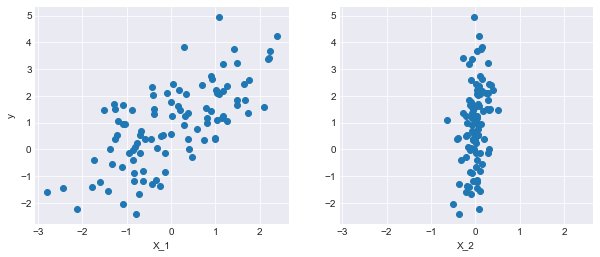

In [6]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X_1,y)
axes[1].scatter(X_2,y)
axes[0].set_ylabel("y"); axes[0].set_xlabel("X_1")
axes[1].set_xlabel("X_2")

Los priors son:

- $\alpha \approx N(0, 10)$
- $\beta[i] \approx N(0, 10)$
- $\sigma \approx$ half-normal($\sigma=1$)

Vamos a definir las variables no observadas como:

$$
\mu = \alpha + \beta[0] * X_1 + \beta[1]*X_2 
$$

Nuestra probabilidad en el teorema de Bayes es una distribución normal:

$$
y \approx N(\mu,\sigma) 
$$

In [7]:
basic_model = pm.Model()

In [8]:
with basic_model:
    
    # Priors
    
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Expected value of outcome
    
    mu = alpha + beta[0]*X_1 + beta[1]*X_2
    
    # Likehood
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)

In [9]:
with basic_model:
    trace = pm.sample(5000,return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 717 seconds.


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

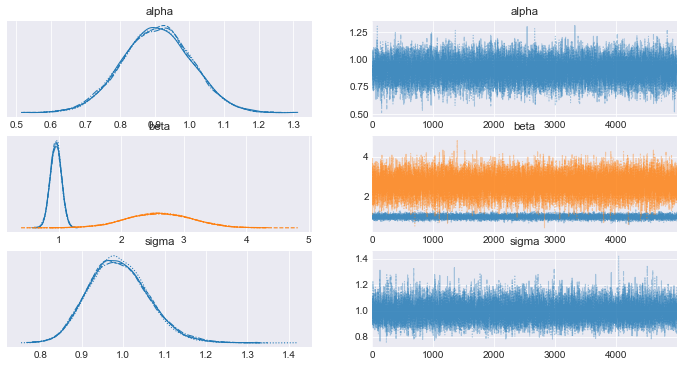

In [10]:
pm.plot_trace(trace)

In [11]:
pm.summary(trace).round(2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.91,0.10,0.71,1.09,0.0,0.0,31352.0,14765.0,1.0
beta[0],0.95,0.09,0.78,1.11,0.0,0.0,28743.0,15881.0,1.0
beta[1],2.60,0.52,1.66,3.60,0.0,0.0,29774.0,16292.0,1.0
sigma,0.99,0.07,0.86,1.12,0.0,0.0,28265.0,14157.0,1.0
